In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import glob as gb
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score
import os

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_data = '/dataset_new/train/'
test_data = '/dataset_new/test/'

In [3]:
for folder in  os.listdir(train_data): 
    files = gb.glob(pathname= str( train_data + folder + '/*.jpg'))
    print(f'For data , found {len(files)} in folder {folder}')

For data , found 617 in folder Closed
For data , found 617 in folder Open
For data , found 617 in folder yawn
For data , found 616 in folder no_yawn


In [4]:
features = {'Closed':0, 'Open':1}
def getcode(n) : 
    for one , two in features.items() : 
        if n == two : 
            return one

In [5]:
size = []
for folder in os.listdir(train_data) :
    if folder == 'Closed' or folder == 'Open':
        files = gb.glob(pathname= str( train_data + folder + '/*.jpg'))
        for file in files: 
            image = plt.imread(file)
            size.append(image.shape)
    else:
        break
pd.Series(size).value_counts

<bound method IndexOpsMixin.value_counts of 0       (223, 223, 3)
1       (109, 110, 3)
2       (300, 266, 3)
3       (232, 273, 3)
4        (91, 115, 3)
            ...      
1229    (539, 529, 3)
1230    (321, 300, 3)
1231      (64, 74, 3)
1232    (427, 311, 3)
1233    (102, 113, 3)
Length: 1234, dtype: object>

In [6]:
pic_size = 140
Train_x = []
Train_y = []
for folder in  os.listdir(train_data) : 
    if folder == 'Closed' or folder == 'Open':
        files = gb.glob(pathname= str( train_data + folder + '/*.jpg'))
        for file in files: 
            image = cv2.imread(file)
            image_array = cv2.resize(image,(pic_size,pic_size))
            Train_x.append(list(image_array))
            Train_y.append(features[folder])
    else:
        break

In [7]:
print(f'we have {len(Train_x)} items in Train_x')
print(f'we have {len(Train_y)} items in Train_y')

we have 1234 items in Train_x
we have 1234 items in Train_y


In [8]:
X_test = []
y_test = []
for folder in  os.listdir(test_data) : 
    if folder == 'Closed' or folder == 'Open':
        files = gb.glob(pathname= str( test_data + folder + '/*.jpg'))
        for file in files: 
            image = cv2.imread(file)
            image_array = cv2.resize(image , (pic_size,pic_size))
            X_test.append(list(image_array))
            y_test.append(features[folder])
    else:
        break

In [9]:
print(f'we have {len(X_test)} items in X_Test')
print(f'we have {len(y_test)} items in Y_Test')

we have 218 items in X_Test
we have 218 items in Y_Test


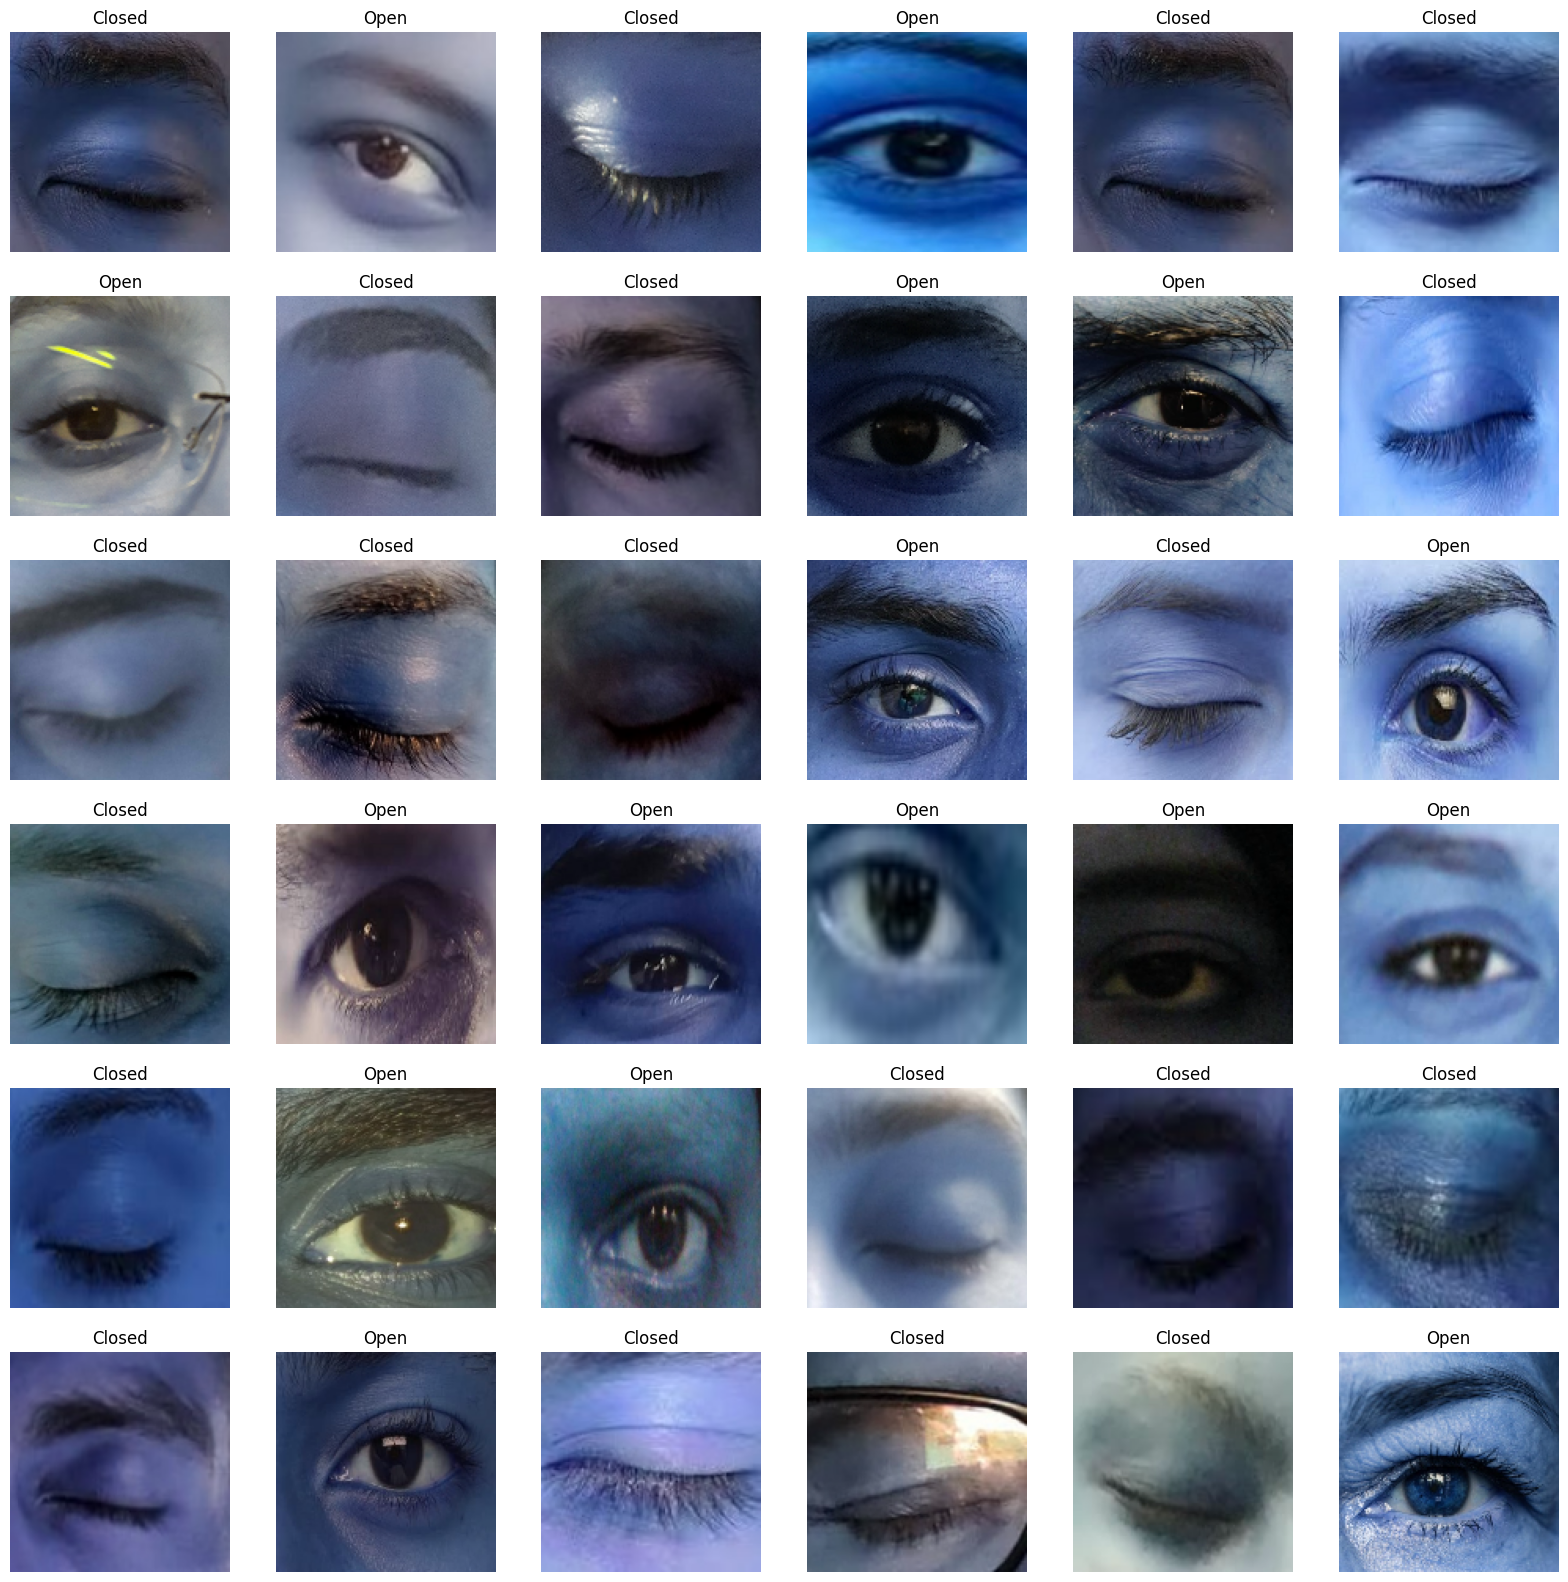

In [10]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(Train_x),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(Train_x[i])   
    plt.axis('off')
    plt.title(getcode(Train_y[i]))

In [11]:
Train_x, X_val, Train_y, y_val = train_test_split(Train_x, Train_y, train_size=0.8, shuffle=True, random_state=0)

Train_x = np.array(Train_x)
Train_y = np.array(Train_y)

X_val = np.array(X_val)
y_val = np.array(y_val)

temp2 = list(zip(X_test, y_test))
random.shuffle(temp2)
X_test, y_test = zip(*temp2)
X_test, y_test = np.array(X_test), np.array(y_test)

In [12]:
model = Sequential([
        Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(pic_size,pic_size,3)),
        Conv2D(32,kernel_size=(3,3),activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(64,kernel_size=(5,5),activation='relu'),    
        Conv2D(64,kernel_size=(5,5),activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(128,kernel_size=(5,5),activation='relu'),
        Conv2D(128,kernel_size=(5,5),activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(256,kernel_size=(3,3),activation='relu'),
        Conv2D(256,kernel_size=(3,3),activation='relu'),
        Flatten() ,    
        Dense(512,activation='relu') ,    
        Dense(512,activation='relu') ,
        Dense(256,activation='relu') ,
        Dense(256,activation='relu') ,
        Dense(128,activation='relu') ,
        Dense(1,activation='sigmoid') ,    
        ])

In [13]:
optimizer= tf.keras.optimizers.Adam(learning_rate=0.00008)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 138, 138, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 136, 136, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 68, 68, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        51264     
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 64)        102464    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [15]:
data_generator = ImageDataGenerator(horizontal_flip=True, rotation_range=10, zoom_range=0.2, 
                             brightness_range=(0.1, 0.8))

In [16]:
epochs = 20
Model = model.fit_generator(data_generator.flow(Train_x,Train_y, batch_size=32), epochs=epochs,
                                     validation_data=(X_val,y_val), validation_steps=1, verbose=1)

/tmp/ipykernel_4457/3636370503.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  Model = model.fit_generator(data_generator.flow(Train_x,Train_y, batch_size=32), epochs=epochs,


Epoch 1/20
31/31 [==============================] - 21s 391ms/step - loss: 0.4714 - accuracy: 0.8034 - val_loss: 0.3634 - val_accuracy: 0.9150
Epoch 2/20
31/31 [==============================] - 6s 177ms/step - loss: 0.2347 - accuracy: 0.9291 - val_loss: 0.2133 - val_accuracy: 0.9514
Epoch 3/20
31/31 [==============================] - 6s 200ms/step - loss: 0.1576 - accuracy: 0.9412 - val_loss: 0.1208 - val_accuracy: 0.9717
Epoch 4/20
31/31 [==============================] - 6s 179ms/step - loss: 0.1342 - accuracy: 0.9554 - val_loss: 0.1710 - val_accuracy: 0.9555
Epoch 5/20
31/31 [==============================] - 5s 175ms/step - loss: 0.1548 - accuracy: 0.9483 - val_loss: 0.1370 - val_accuracy: 0.9555
Epoch 6/20
31/31 [==============================] - 6s 180ms/step - loss: 0.1228 - accuracy: 0.9645 - val_loss: 0.1127 - val_accuracy: 0.9757
Epoch 7/20
31/31 [==============================] - 6s 176ms/step - loss: 0.0996 - accuracy: 0.9666 - val_loss: 0.1713 - val_accuracy: 0.9676
Epoch

In [17]:
Loss,Accuracy = model.evaluate(X_test, y_test,batch_size=32)

print('Test Loss is {}'.format(Loss))
print('Test Accuracy is {}'.format(Accuracy ))

7/7 [==============================] - 1s 129ms/step - loss: 0.1242 - accuracy: 0.9771
Test Loss is 0.12415795773267746
Test Accuracy is 0.9770641922950745


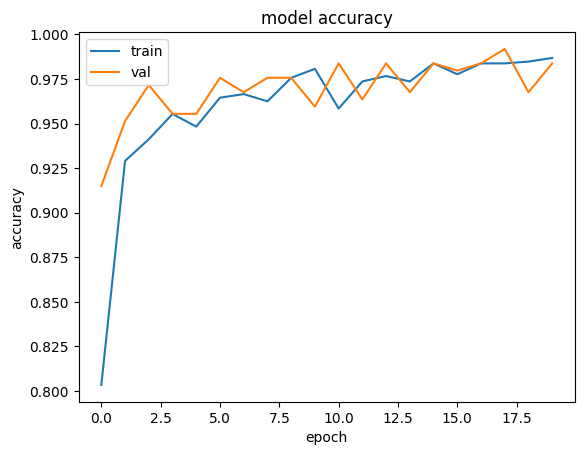

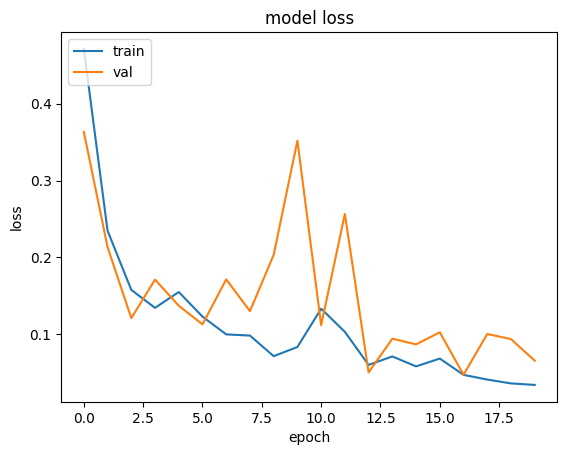

In [20]:

plt.plot(Model.history['accuracy'])
plt.plot(Model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(Model.history['loss'])
plt.plot(Model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Predict testing data

In [21]:
y_pred = model.predict(X_test)
pred = [1 * (x[0]>=0.5) for x in y_pred]
print('Prediction Shape is {}'.format(y_pred.shape))

7/7 [==============================] - 0s 17ms/step
Prediction Shape is (218, 1)


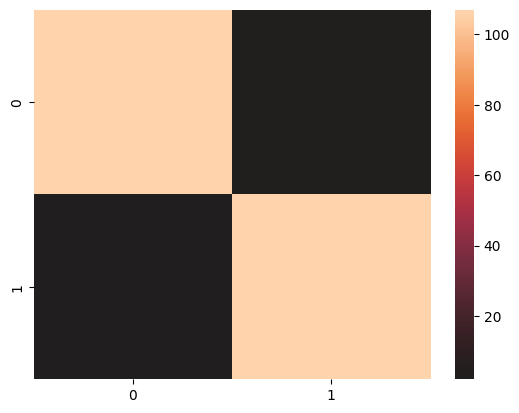

Confusion Matrix is
 [[106   3]
 [  2 107]]


In [22]:
CM = confusion_matrix(y_test, pred)

sns.heatmap(CM, center=True)
plt.show()

print('Confusion Matrix is\n', CM)


In [23]:
print(classification_report(y_test, pred))
print(accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       109
           1       0.97      0.98      0.98       109

    accuracy                           0.98       218
   macro avg       0.98      0.98      0.98       218
weighted avg       0.98      0.98      0.98       218

0.9770642201834863


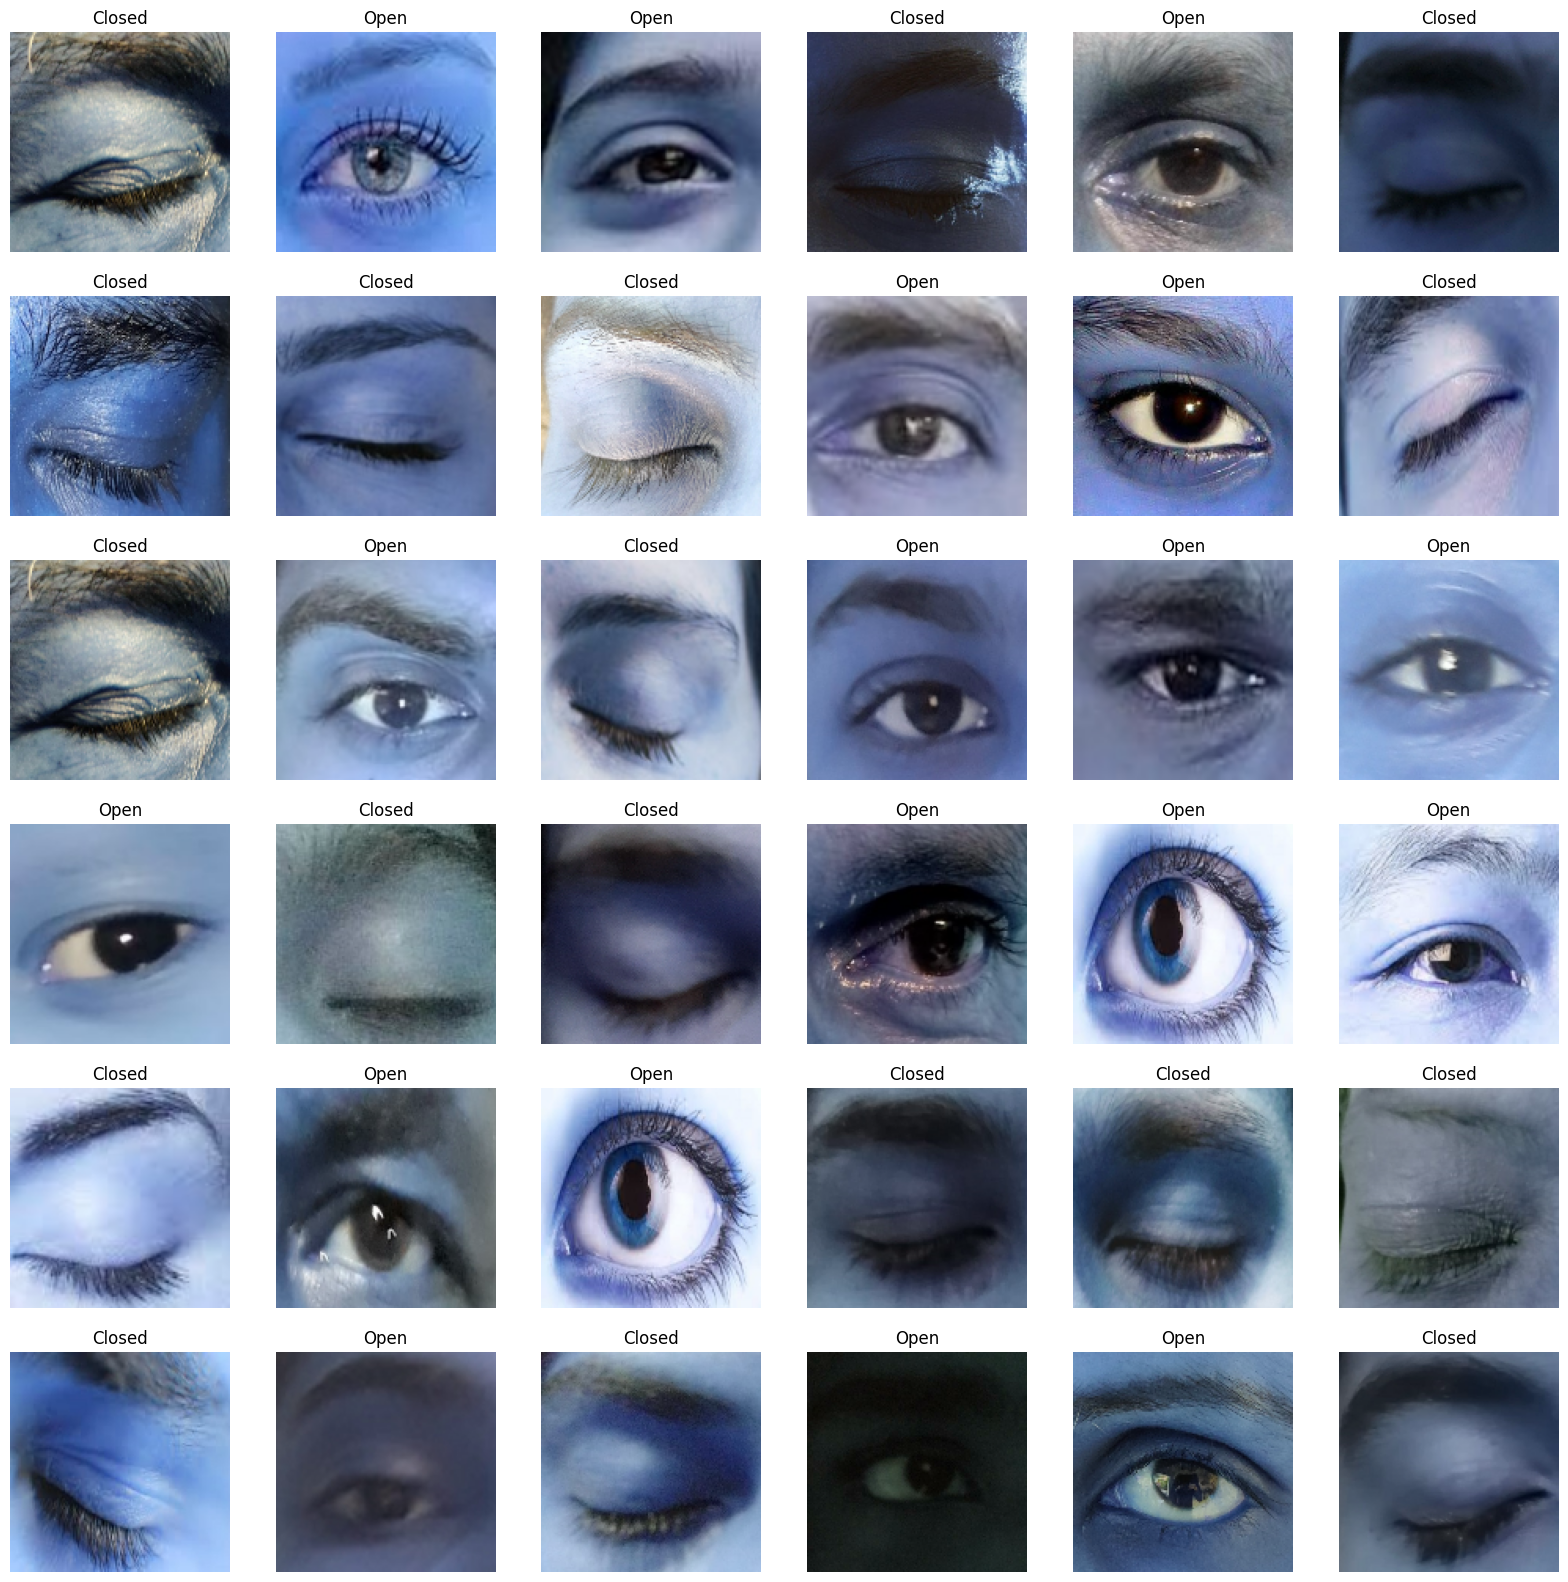

In [24]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(pred[i]))

In [25]:
model.save('cnnCat.h5')

In [26]:
"""
from tensorflow.keras.models import load_model
import cv2
import numpy as np

model = load_model('driver_state.h5')

test_image = cv2.imread('test_image.jpg') 
preprocessed_image = preprocess_image(test_image) 

input_image = np.expand_dims(preprocessed_image, axis=0)

segmentation_mask = model.predict(input_image)

segmented_image = np.argmax(segmentation_mask, axis=-1)[0]

cv2.imshow('Segmented Image', segmented_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
"""

"\nfrom tensorflow.keras.models import load_model\nimport cv2\nimport numpy as np\n\nmodel = load_model('driver_state.h5')\n\ntest_image = cv2.imread('test_image.jpg') \npreprocessed_image = preprocess_image(test_image) \n\ninput_image = np.expand_dims(preprocessed_image, axis=0)\n\nsegmentation_mask = model.predict(input_image)\n\nsegmented_image = np.argmax(segmentation_mask, axis=-1)[0]\n\ncv2.imshow('Segmented Image', segmented_image)\ncv2.waitKey(0)\ncv2.destroyAllWindows()\n"